In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk("C:\\Users\\caoho\\Desktop\\homework new\\biostat625\\final\\realwaste-main\\RealWaste"):
        print(dirname)


C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Cardboard
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Food Organics
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Glass
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Metal
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Miscellaneous Trash
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Paper
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Plastic
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Textile Trash
C:\Users\caoho\Desktop\homework new\biostat625\final\realwaste-main\RealWaste\Vegetation


In [2]:
train_path = "C:\\Users\\caoho\\Desktop\\homework new\\biostat625\\final\\realwaste-main\\RealWaste"
test_path = "C:\\Users\\caoho\\Desktop\\homework new\\biostat625\\final\\realwaste-main\\RealWaste"

In [3]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from tensorflow.keras.utils import plot_model

from glob import glob

In [4]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|███████████████████████████████████████████████████████████████████████████████| 436/436 [00:02<00:00, 191.54it/s]


In [5]:
data.shape

(4752, 2)

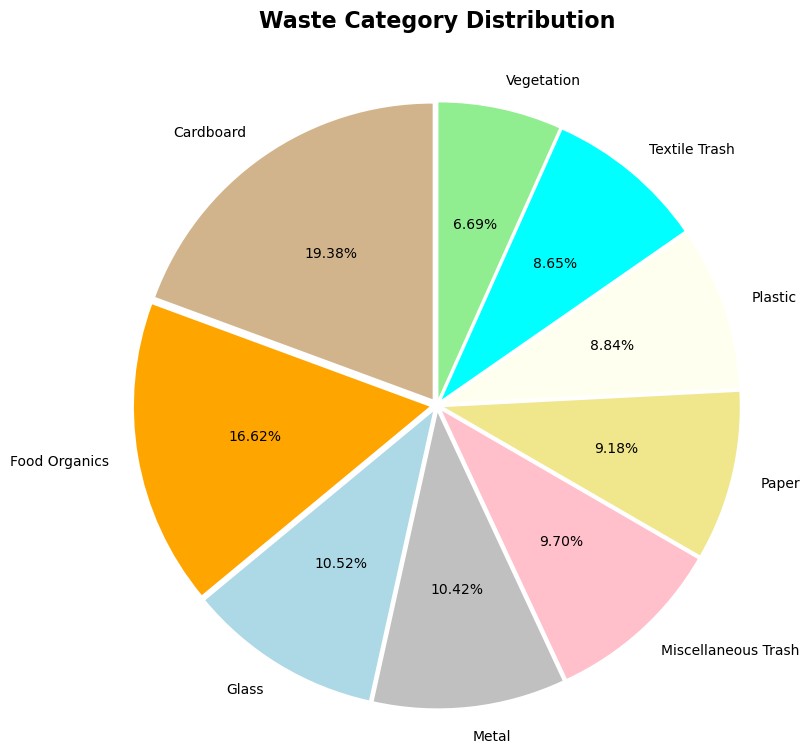

In [26]:
import matplotlib.pyplot as plt

labels = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 
          'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
colors = ['tan', 'orange', 'lightblue', 'silver', 'pink', 
          'khaki', 'ivory', 'cyan', 'lightgreen']

plt.pie(data.label.value_counts(), labels=labels, colors=colors, 
        startangle=90, explode=[0.05] * len(labels), 
        autopct='%0.2f%%', radius=2)

plt.title('Waste Category Distribution', y=1.5, fontsize=16, weight='bold')

plt.show()



In [14]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  9


# CNN set up

In [49]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

batch_size = 256

In [16]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [73]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 4752 images belonging to 9 classes.
Found 4752 images belonging to 9 classes.


GPU is not available. Please check your CUDA installation.


In [74]:
hist = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.4207 - loss: 1.6462 - val_accuracy: 0.5324 - val_loss: 1.3911
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.4556 - loss: 1.5720 - val_accuracy: 0.5652 - val_loss: 1.2831
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.4868 - loss: 1.4904 - val_accuracy: 0.6054 - val_loss: 1.1726
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.5046 - loss: 1.4236 - val_accuracy: 0.6275 - val_loss: 1.1028
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.5426 - loss: 1.3452 - val_accuracy: 0.6665 - val_loss: 1.0310
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.5443 - loss: 1.3225 - val_accuracy: 0.7073 - val_loss: 0.9039
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.5998 - loss: 1.1556 - val_accuracy: 0.7287 - val_loss: 0.8211
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.6147 - loss: 1.1021 - val_accuracy: 0.7723 - val_loss:

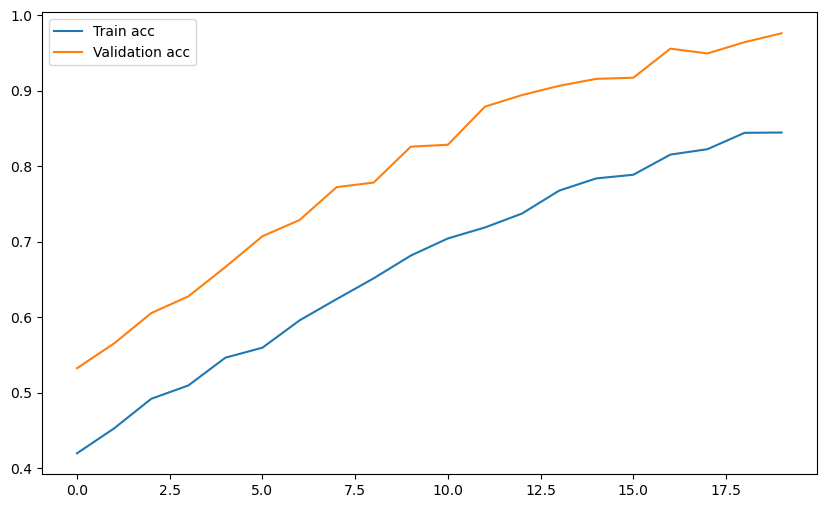

In [75]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()


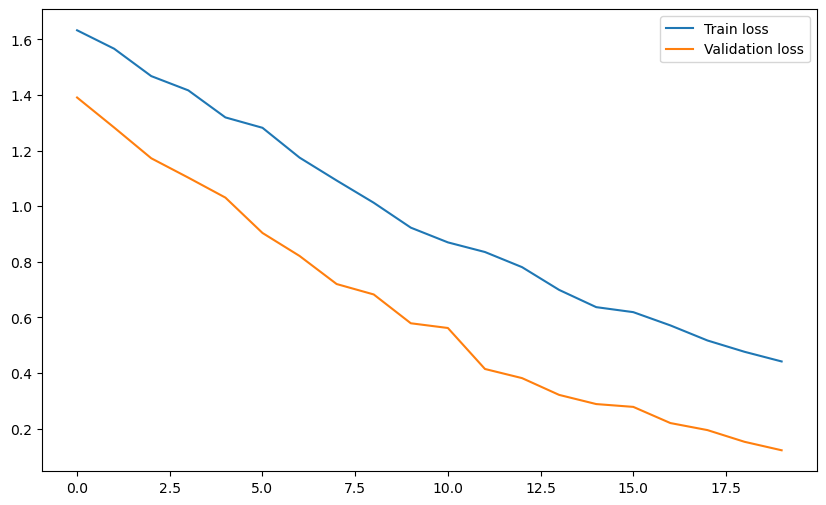

In [76]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [92]:
def predict_func(img):
    # Set the figure size for displaying the image
    plt.figure(figsize=(6, 4))
    # Convert BGR image to RGB for proper display
    if img is None:
        print("\033[91m" + "Error: Image not found. Please check the file path." + "\033[0m")
        return
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    # Resize the image to the input size expected by the model (224x224)
    img = cv2.resize(img, (224, 224))
    # Add batch dimension (reshape to [1, 224, 224, 3])
    img = np.reshape(img, [1, 224, 224, 3])
    # Predict the class of the image using the model
    result = np.argmax(model.predict(img))
    
    # Classify the result into different categories
    if result == 0:
        print("\033[94m" + "This image → Cardboard" + "\033[0m")
    elif result == 1:
        print("\033[94m" + "This image → Food Organics" + "\033[0m")
    elif result == 2:
        print("\033[94m" + "This image → Glass" + "\033[0m")
    elif result == 3:
        print("\033[94m" + "This image → Metal" + "\033[0m")
    elif result == 4:
        print("\033[94m" + "This image → Miscellaneous Trash" + "\033[0m")
    elif result == 5:
        print("\033[94m" + "This image → Paper" + "\033[0m")
    elif result == 6:
        print("\033[94m" + "This image → Plastic" + "\033[0m")
    elif result == 7:
        print("\033[94m" + "This image → Textile Trash" + "\033[0m")
    elif result == 8:
        print("\033[94m" + "This image → Vegetation" + "\033[0m")
    else:
        print("\033[91m" + "Unknown category" + "\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This image → Cardboard


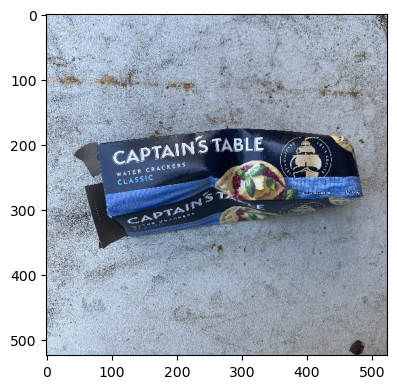

In [104]:
test_img1 = cv2.imread("C:\\Users\\caoho\\Desktop\\homework new\\biostat625\\final\\realwaste-main\\RealWaste\\Cardboard\\Cardboard_123.jpg")
predict_func(test_img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image → Vegetation


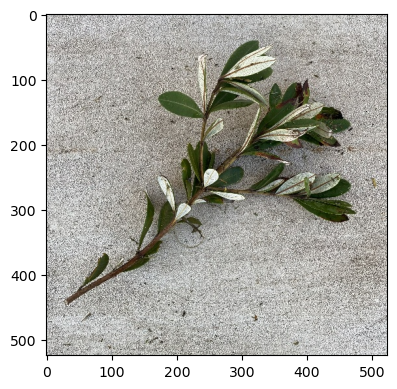

In [101]:
test_img2 = cv2.imread("C:\\Users\\caoho\\Desktop\\homework new\\biostat625\\final\\realwaste-main\\RealWaste\\Vegetation\\Vegetation_169.jpg")
predict_func(test_img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image → Textile Trash


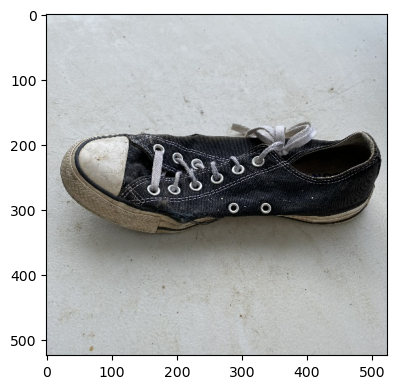

In [98]:
test_img3 = cv2.imread("C:\\Users\\caoho\\Desktop\\homework new\\biostat625\\final\\realwaste-main\\RealWaste\\Textile Trash\\Textile Trash_265.jpg")
predict_func(test_img3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
This image → Metal


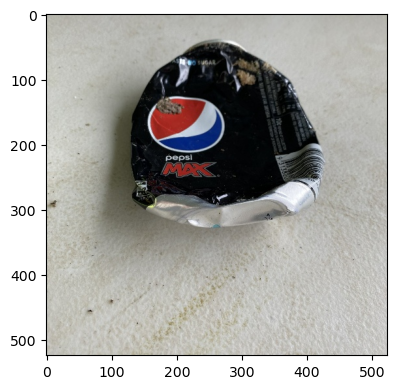

In [96]:
test_img4 = cv2.imread("C:\\Users\\caoho\\Desktop\\homework new\\biostat625\\final\\realwaste-main\\RealWaste\\Metal\\Metal_24.jpg")
predict_func(test_img4)